<a href="https://colab.research.google.com/github/Gizem-kaya/Image-Processing-with-Python/blob/master/Image_restoration_noise_segmentation_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image restoration, Noise, Segmentation and Contours**

In [17]:
import numpy as np
from skimage.restoration import inpaint_biharmonic
from skimage.restoration import inpaint
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
from skimage.segmentation import slic
from skimage.color import label2rgb


In [11]:
def show_comparison(original, title, filtered, new_title):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,12), sharex = True, sharey = True )

  ax1.imshow(original, cmap = plt.cm.gray)
  ax1.set_title(title)
  ax1.axis('off')

  ax2.imshow(filtered, cmap = plt.cm.gray)
  ax2.set_title(new_title)
  ax2.axis('off')

  plt.show()

### **Image restoration**

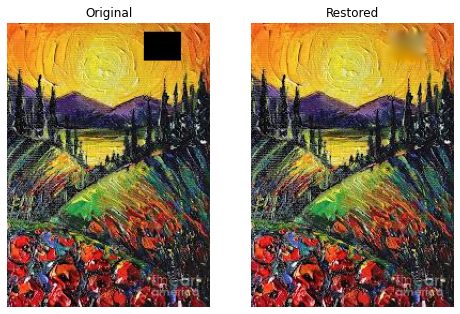

In [6]:
restore = plt.imread("restore.jpg")

mask = np.zeros(restore.shape[:-1])

mask[8:37, 127:164] = 1

restored = inpaint_biharmonic(restore, mask, multichannel = True)

show_comparison(restore,"Original", restored, "Restored")


If the missing part has an homogeneous background, the restoration process would fill this part more properly.

### **Noise**

Adding noise to an image.

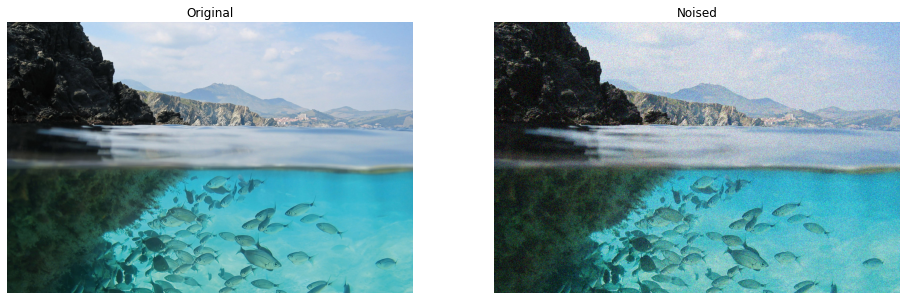

In [12]:
noise = plt.imread("noise.jpg")

noised = random_noise(noise)

show_comparison(noise, "Original", noised, "Noised")

**Reducing noise :**

*   Total Variation (TV)
*   Bilateral



 **1.   Total Variation (TV)**




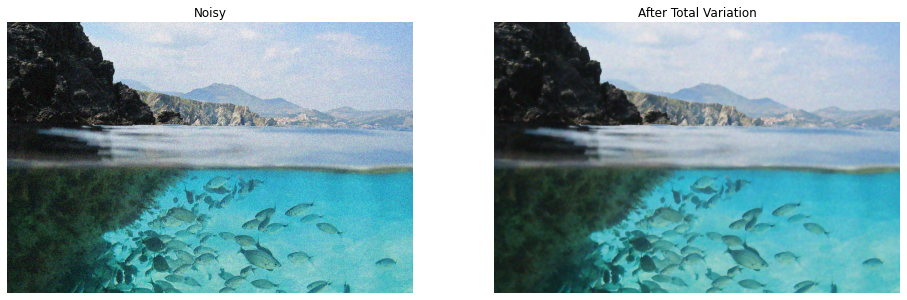

In [14]:
reduced_TV =  denoise_tv_chambolle(noised, multichannel = True)

show_comparison(noised, "Noisy", reduced_TV , "After Total Variation")

When we look closely we can see the edges in the picture are blurred. To be able to preseve the edges, we can use Bilateral Denoising.



 **2. Bilateral**

   Smoothes images while preserving edges.

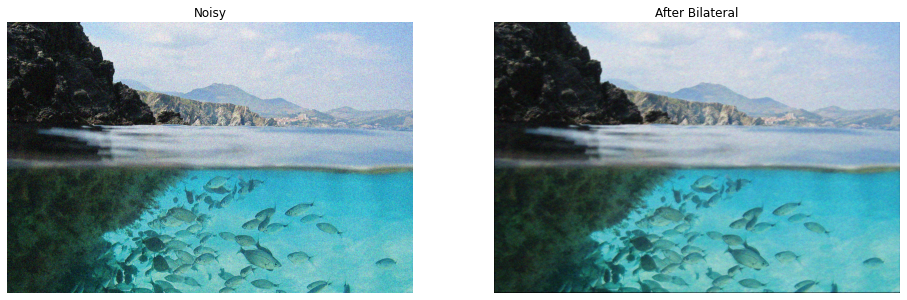

In [16]:
reduced_bilateral = denoise_bilateral(noised, multichannel = True)

show_comparison(noised, "Noisy", reduced_bilateral , "After Bilateral")

### **Superpixels and Segmentation**

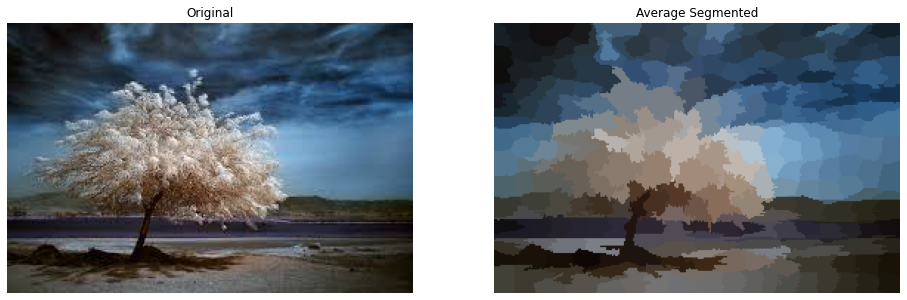

In [19]:
tree = plt.imread("segmentation.jpg")

segments = slic(tree, n_segments = 300)

segmented_avg = label2rgb(segments, tree, kind = "avg")

show_comparison(tree, "Original", segmented_avg, "Average Segmented")

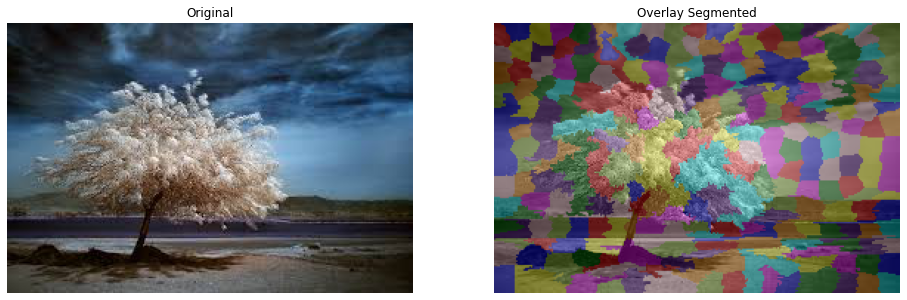

In [20]:
segmented_overlay = label2rgb(segments, tree, kind = "overlay") # The colors are selected randomly.

show_comparison(tree, "Original", segmented_overlay, "Overlay Segmented")

### **Finding Contours**